In [ ]:
import torch

from diffusers.latent_diffusion import LatentDiffusionModel, LatentUNet
from diffusers.vae import VAE

vae = VAE.from_pretrained('../data/cat_model/vae/vae-ema-final.safetensors')

ldm = LatentDiffusionModel.from_pretrained(vae, '../data/cat_model/unet/ldm-final.safetensors')


DDIM Sampling: 100%|██████████| 50/50 [00:00<00:00, 72.68it/s]


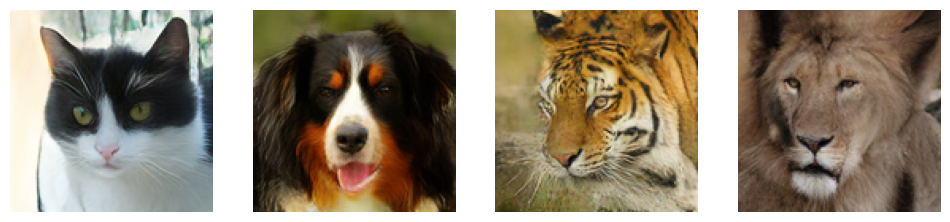

In [14]:
ldm.to('cuda')
ldm.eval()

# Generate samples using the model
samples = ldm.sample(
    4, (4, 16, 16), num_inference_steps=50, class_labels=torch.tensor([0,1,2,3]), cfg_scale=5.0
)

# display the samples
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
for i in range(4):
    axs[i].imshow(samples[i].permute(1, 2, 0).cpu().numpy() * 0.5 + 0.5)
    axs[i].axis('off')
plt.show()